In [1]:
#!pip3 install nb_black
%load_ext lab_black

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile

In [3]:
# training data download
#!wget --no-check-certificate      https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip      -O ~/Desktop/tensorflow-specialisation/1-tensorflow-basics/horse-or-human.zip

--2021-06-09 16:50:41--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.183.48, 142.250.183.80, 142.250.183.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.183.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/home/sharoonsaxena/Desktop/tensorflow-specialisation/1-tensorflow-basics/horse-or-human.zip’

/home/sharoonsaxena 100%[===================>] 142.65M   676KB/s    in 3m 28s  

2021-06-09 16:54:11 (701 KB/s) - ‘/home/sharoonsaxena/Desktop/tensorflow-specialisation/1-tensorflow-basics/horse-or-human.zip’ saved [149574867/149574867]

--2021-06-09 16:54:11--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.67.240, 172.217.166.176, 172.217.166.48, ...
Connecting to 

In [6]:
# validation data download
!wget --no-check-certificate      https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip  -O ~/Desktop/tensorflow-specialisation/1-tensorflow-basics/validation-horse-or-human.zip

--2021-06-09 17:36:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.167.176, 172.217.174.240, 216.58.203.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.167.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/home/sharoonsaxena/Desktop/tensorflow-specialisation/1-tensorflow-basics/validation-horse-or-human.zip’

/home/sharoonsaxena 100%[===================>]  10.95M   571KB/s    in 20s     

2021-06-09 17:37:18 (560 KB/s) - ‘/home/sharoonsaxena/Desktop/tensorflow-specialisation/1-tensorflow-basics/validation-horse-or-human.zip’ saved [11480187/11480187]



In [7]:
# Extracting the zip files
file = "horse-or-human.zip"
zip_ref = zipfile.ZipFile(file, "r")
zip_ref.extractall("horse-or-huma.zip")
zip_ref.close()

file = "validation-horse-or-human.zip"
zip_ref = zipfile.ZipFile(file, "r")
zip_ref.extractall("validation-horse-or-huma.zip")
zip_ref.close()

In [8]:
# setting data paths for train
train_horse_path = "/home/sharoonsaxena/Desktop/tensorflow-specialisation/1-tensorflow-basics/horse-or-huma.zip/horses"
train_human_path = "/home/sharoonsaxena/Desktop/tensorflow-specialisation/1-tensorflow-basics/horse-or-huma.zip/humans"

# setting data paths for validation
validation_horse_path = "/home/sharoonsaxena/Desktop/tensorflow-specialisation/1-tensorflow-basics/validation-horse-or-huma.zip/horses"
validation_human_path = "/home/sharoonsaxena/Desktop/tensorflow-specialisation/1-tensorflow-basics/validation-horse-or-huma.zip/humans"

In [9]:
# eye balling the name of the images
train_horse_names = os.listdir(train_horse_path)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_path)
print(train_human_names[:10])

['horse21-1.png', 'horse30-5.png', 'horse48-8.png', 'horse08-0.png', 'horse43-0.png', 'horse10-3.png', 'horse24-1.png', 'horse19-2.png', 'horse22-6.png', 'horse40-3.png']
['human14-22.png', 'human05-14.png', 'human03-02.png', 'human12-10.png', 'human05-07.png', 'human17-01.png', 'human17-19.png', 'human05-01.png', 'human14-02.png', 'human10-11.png']


In [10]:
# eyeballing the number of images in train path
print("total training horse images:", len(os.listdir(train_horse_path)))
print("total training human images:", len(os.listdir(train_human_path)))

# eyeballing the number of images in test path
print("total validation horse images:", len(os.listdir(validation_horse_path)))
print("total validation human images:", len(os.listdir(validation_human_path)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph, we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

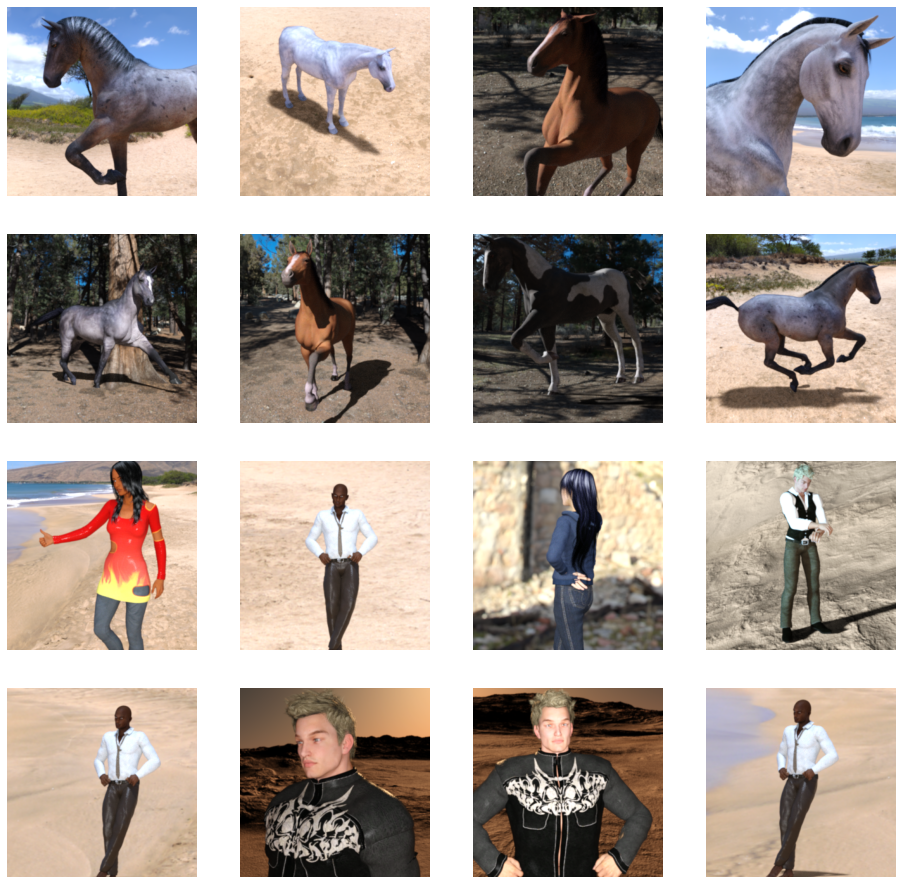

In [12]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [
    os.path.join(train_horse_path, fname)
    for fname in train_horse_names[pic_index - 8 : pic_index]
]
next_human_pix = [
    os.path.join(train_human_path, fname)
    for fname in train_human_names[pic_index - 8 : pic_index]
]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis("Off")  # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

### Creating Data inflow for training and validation to the neural network.

<img src="https://raw.githubusercontent.com/SharoonSaxena/repo-image-hosting/main/Screenshot%20from%202021-06-09%2006-06-41.png">

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescaling images
train_datagen = ImageDataGenerator(rescale=1 / 255)

# flowing images for training in batches of 128
train_generator = train_datagen.flow_from_directory(
    "/home/sharoonsaxena/Desktop/tensorflow-specialisation/1-tensorflow-basics/horse-or-huma.zip/",  # source directory
    target_size=(300, 300),  # images will be rescaled to this size
    batch_size=128,  # images will flow in the sets of 128
    class_mode="binary",  # since there are only two classes
)

# rescaling images
validation_datagen = ImageDataGenerator(rescale=1 / 255)

# flowing images for training in batches of 128
validation_generator = validation_datagen.flow_from_directory(
    "/home/sharoonsaxena/Desktop/tensorflow-specialisation/1-tensorflow-basics/validation-horse-or-huma.zip/",  # source directory
    target_size=(300, 300),  # images will be rescaled to this size
    batch_size=128,  # images will flow in the sets of 128
    class_mode="binary",  # since there are only two classes
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [14]:
# defining layers

# first conv
first = keras.layers.Conv2D(
    filters=64, kernel_size=(3, 3), activation="relu", input_shape=(300, 300, 3)
)
pool1 = keras.layers.MaxPooling2D(2, 2)

# second convolution
conv2 = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")
pool2 = keras.layers.MaxPooling2D(2, 2)

# third convolution
conv3 = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")
pool3 = keras.layers.MaxPooling2D(2, 2)

# foutrth convolution
conv4 = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")
pool4 = keras.layers.MaxPooling2D(2, 2)

# fifth convolution
conv5 = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")
pool5 = keras.layers.MaxPooling2D(2, 2)

# flattening
flatten = keras.layers.Flatten()

# dense layer
dense = keras.layers.Dense(units=512, activation="relu")

# output layer
last = keras.layers.Dense(units=1, activation="sigmoid")

# defining model
model = keras.models.Sequential(
    [
        first,
        pool1,
        conv2,
        pool2,
        conv3,
        pool3,
        conv4,
        pool4,
        conv5,
        pool5,
        flatten,
        dense,
        last,
    ]
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [16]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    loss="binary_crossentropy", optimizer=RMSprop(0.001), metrics=["accuracy"]
)

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,  # since 8 steps will pass all data once
    epochs=20,
    verbose=1,
    validation_data=validation_generator,
)

Epoch 1/20
8/8 [==============================] - 97s 12s/step - loss: 1.0589 - accuracy: 0.5395 - val_loss: 0.6847 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 115s 15s/step - loss: 0.7022 - accuracy: 0.5342 - val_loss: 0.7689 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 112s 14s/step - loss: 0.6631 - accuracy: 0.5651 - val_loss: 0.9437 - val_accuracy: 0.5000
Epoch 4/20
8/8 [==============================] - 120s 17s/step - loss: 0.6204 - accuracy: 0.7097 - val_loss: 0.3878 - val_accuracy: 0.8555
Epoch 5/20
8/8 [==============================] - 127s 16s/step - loss: 0.4899 - accuracy: 0.7775 - val_loss: 0.9055 - val_accuracy: 0.8242
Epoch 6/20
8/8 [==============================] - 137s 17s/step - loss: 0.3114 - accuracy: 0.8867 - val_loss: 1.1830 - val_accuracy: 0.8320
Epoch 7/20
8/8 [==============================] - 126s 16s/step - loss: 0.3112 - accuracy: 0.8954 - val_loss: 1.2272 - val_accuracy: 0.7891
Epoch 8/20
8/8 [=====